주성분분석-유방암
==
- 주성분 분석
- 30% 중요 데이터만 사용 SelectPercentile
- tSNE 

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC3/blob/main/gg-42-주성분분석_tSNE_유방암.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC3/blob/main/gg-42-주성분분석_tSNE_유방암.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

(-8.0, 4.0)

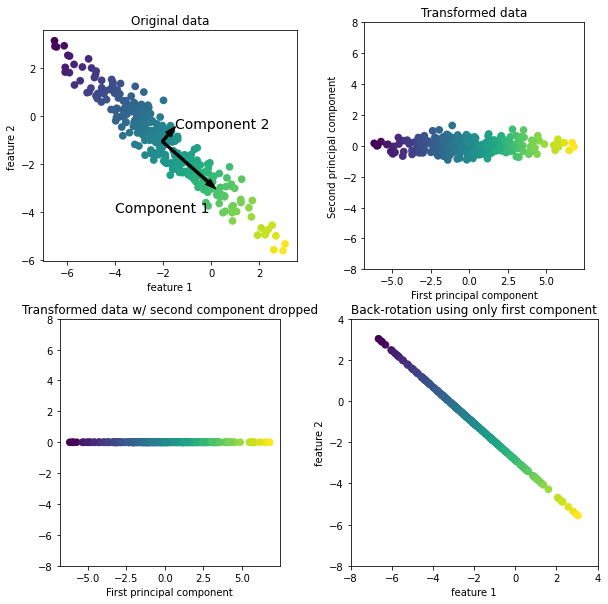

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

pca = PCA()
pca.fit(X_blob)
X_pca = pca.transform(X_blob)

S = X_pca.std(axis=0)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

axes[0].set_title("Original data")
axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0], linewidths=0,
                s=60, cmap='viridis')
axes[0].set_xlabel("feature 1")
axes[0].set_ylabel("feature 2")
axes[0].arrow(pca.mean_[0], pca.mean_[1], S[0] * pca.components_[0, 0],
              S[0] * pca.components_[0, 1], width=.1, head_width=.3,
              color='k')
axes[0].arrow(pca.mean_[0], pca.mean_[1], S[1] * pca.components_[1, 0],
              S[1] * pca.components_[1, 1], width=.1, head_width=.3,
              color='k')
axes[0].text(-1.5, -.5, "Component 2", size=14)
axes[0].text(-4, -4, "Component 1", size=14)
axes[0].set_aspect('equal')

axes[1].set_title("Transformed data")
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0,
                s=60, cmap='viridis')
axes[1].set_xlabel("First principal component")
axes[1].set_ylabel("Second principal component")
axes[1].set_aspect('equal')
axes[1].set_ylim(-8, 8)

pca = PCA(n_components=1)
pca.fit(X_blob)
X_inverse = pca.inverse_transform(pca.transform(X_blob))

axes[2].set_title("Transformed data w/ second component dropped")
axes[2].scatter(X_pca[:, 0], np.zeros(X_pca.shape[0]), c=X_pca[:, 0],
                linewidths=0, s=60, cmap='viridis')
axes[2].set_xlabel("First principal component")
axes[2].set_aspect('equal')
axes[2].set_ylim(-8, 8)

axes[3].set_title("Back-rotation using only first component")
axes[3].scatter(X_inverse[:, 0], X_inverse[:, 1], c=X_pca[:, 0],
                linewidths=0, s=60, cmap='viridis')
axes[3].set_xlabel("feature 1")
axes[3].set_ylabel("feature 2")
axes[3].set_aspect('equal')
axes[3].set_xlim(-8, 4)
axes[3].set_ylim(-8, 4)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn import feature_selection
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
cancer = load_breast_cancer()
X_all = cancer.data
y = cancer.target
sc = StandardScaler()
X_all = sc.fit_transform(X_all)

In [ ]:
X_all.shape

(569, 30)

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## 30개의 특성을 모두 사용하는 경우

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
## 교차검증
cross_val_score(rfc, X_all, y, cv=5).mean().round(4)

0.9597

## 6개의 특성만 사용하는 경우

In [ ]:
fs = SelectPercentile(feature_selection.chi2, percentile = 20)
X_P = fs.fit_transform(cancer.data, y)
X_P = sc.fit_transform(X_P)
cancer.feature_names[fs.get_support()]

array(['mean perimeter', 'mean area', 'area error', 'worst radius',
       'worst perimeter', 'worst area'], dtype='<U23')

In [ ]:
cross_val_score(rfc, X_P, y).mean().round(4)

0.935

## 2개의 특성만 사용하는 경우

In [ ]:
# 상위 20%의 유효한 특성만 선택 (6개))
fs = SelectPercentile(feature_selection.chi2, percentile = 6)
X_P = fs.fit_transform(cancer.data, y)
X_P = sc.fit_transform(X_P)
cancer.feature_names[fs.get_support()]

/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


array(['mean area', 'worst area'], dtype='<U23')

In [ ]:
cancer.data.shape, X_P.shape

((569, 30), (569, 2))

In [ ]:
cross_val_score(rfc, X_P, y).mean().round(4)

0.9209

## PCA로 두개의 차원만 사용하는 경우

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_all)

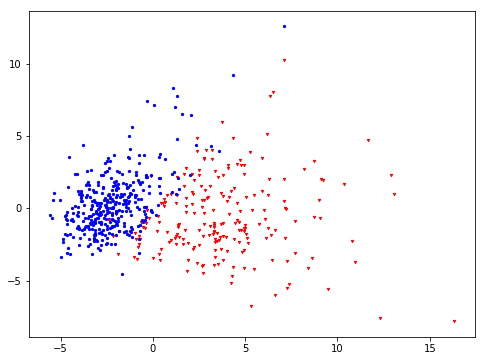

In [ ]:
m = ['v', 'o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(pca_result[:,0][i],pca_result[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

In [ ]:
pca.components_.round(3)

array([[ 0.219,  0.104,  0.228,  0.221,  0.143,  0.239,  0.258,  0.261,
         0.138,  0.064,  0.206,  0.017,  0.211,  0.203,  0.015,  0.17 ,
         0.154,  0.183,  0.042,  0.103,  0.228,  0.104,  0.237,  0.225,
         0.128,  0.21 ,  0.229,  0.251,  0.123,  0.132],
       [-0.234, -0.06 , -0.215, -0.231,  0.186,  0.152,  0.06 , -0.035,
         0.19 ,  0.367, -0.106,  0.09 , -0.089, -0.152,  0.204,  0.233,
         0.197,  0.13 ,  0.184,  0.28 , -0.22 , -0.045, -0.2  , -0.219,
         0.172,  0.144,  0.098, -0.008,  0.142,  0.275]])

In [ ]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.44272026, 0.18971182]), 0.6324320765155935)

## 2개의 주성분만 사용하여 분류를 수행

In [ ]:
cross_val_score(rfc, pca_result, y, cv=5).mean().round(4)

0.9368

## 6개의 주성분만 사용하여 분류를 수행

In [ ]:
pca = PCA(n_components=6)
pca_result = pca.fit_transform(X_all)
cross_val_score(rfc, pca_result, y, cv=5).mean().round(4)

0.9561

## tSNE 시각화

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(cancer.data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679705
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.951431
[t-SNE] Error after 1000 iterations: 0.217100


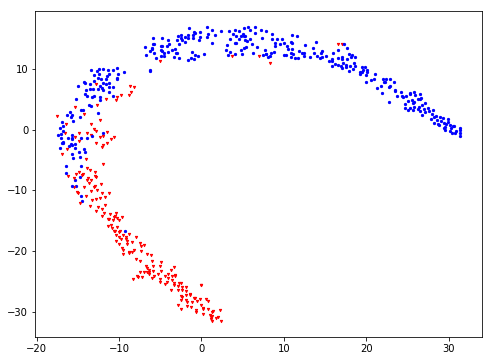

In [ ]:
m = ['v','o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_results[:,0][i],tsne_results[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

### 표준화 후 시각화

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X_all)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.808334
[t-SNE] Error after 1000 iterations: 0.897427


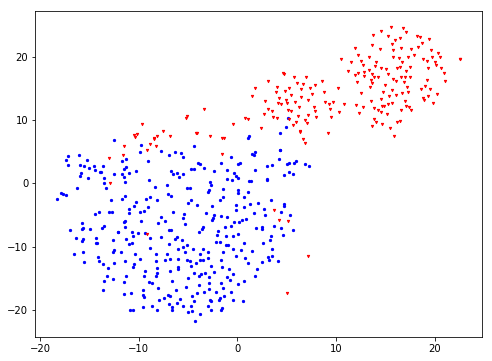

In [ ]:
m = ['v','o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_results[:,0][i],tsne_results[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()